
Title: Random Forest Regressor for Property Prediction
=======
- Created: 2019.10.03
- Updated: 2019.12.17
- Author: Kyung Min, Lee

Learned from 
- "Chapter 2 of Hands-on Machine Learning Book"
- Sckit-Learn documents


## A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

> class sklearn.ensemble.RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)[source]

HyperParameters
---


- **n_estimators**[integer, optional (default=10)]: The number of trees in the forest.
  - Changed in version 0.20: The default value of n_estimators will change from 10 in version 0.20 to 100 in version 0.22.
  
- **criterion**[string, optional (default=”mse”)]: The function to measure the quality of a split.   
  - Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.

- **max_depth**[integer or None, optional (default=None)]: The maximum depth of the tree. 
  - If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
  
- **min_samples_split**[int, float, optional (default=2)]: The minimum number of samples required to split an internal node:
  - If int, then consider min_samples_split as the minimum number.
  - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
  
- **min_samples_leaf**[int, float, optional (default=1)]: The minimum number of samples required to be at a leaf node. 
  - A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. <u>This may have the effect of smoothing the model, especially in regression.</u>
  - If int, then consider min_samples_leaf as the minimum number.
  - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
  
- **min_weight_fraction_leaf**[float, optional (default=0.)]
  - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
  - Samples have equal weight when sample_weight is not provided.
  
- **max_features**[int, float, string or None, optional (default=”auto”)]: The number of features to consider when looking for the best split:
  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  - If “auto”, then max_features=n_features.
  - If “sqrt”, then max_features=sqrt(n_features).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- **max_leaf_nodes**[int or None, optional (default=None)]: Grow trees with max_leaf_nodes in best-first fashion.
  - Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
  
- **min_impurity_decrease**[float, optional (default=0.)]: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
  - The weighted impurity decrease equation is the following: (Node importance using Gini Importace)
  ![gini_imp](https://miro.medium.com/max/757/1*mcHzG8OjhQ2ryiBH7MBPUA.png)
  ![gini_imp1](https://miro.medium.com/max/1498/1*uAGS042OxMJ4Ic3k4s313Q.png)
  ![gini_imp2](https://miro.medium.com/max/2829/1*gdMrk7yEPJLio0d0Sixtkg.png)
  ![gini_imp3](https://miro.medium.com/max/1634/1*C-bkgMBs4drNVyBb1VJcEQ.png)
  
- **bootstrap**[boolean, optional (default=True)]: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

- **oob_score**[bool, optional (default=False)]: whether to use out-of-bag samples to estimate the R^2 on unseen data.

- **n_jobs**[int or None, optional (default=None)]: The number of jobs to run in parallel for both fit and predict. 
  - None` means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
  
- **random_state**[int, RandomState instance or None, optional (default=None)] 
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

- **verbose**[int, optional (default=0)]: Controls the verbosity when fitting and predicting.

- **warm_start**[bool, optional (default=False)]: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. 




Explanation of Random Forest's Main Parameters
---

random forest model에서 주요 parameter는

n_estimators : 생성할 tree의 개수와

max_features : 최대 선택할 특성의 수입니다.

random forest는 기본적으로 bootstrap sampling(복원추출)을 사용하며 decision tree 생성으로 algorithm으로 진행합니다.

bootstrap sampling에서 어떤 데이터 포인트는 약 36.6%정도 누락될 확률이 존재하는데
이 것은 다음과정으로 확인할 수 있습니다.

 - 100개의 표본중 표본 하나가 선택되지 않을 확률은 99/100
 - 뽑은 표본을 제외하지 않고 100번 반복할 때 한번도 선택되지 않을 확률: (0.99)^100 = 0.366

 

n_estimators에서bootstrap sampling은 random forest의 tree가 조금씩 다른 데이터셋으로 만들어지도록합니다. max_feature에서 각 node는 특성의 일부를 무작위로 추출하여 사용합니다.
max_features를 전체 특성의수로 설정하면 모든 특성을 고려하므로 decision tree에서 무작위성이 들어가지 않습니다.

그러나 bootstrap sampling의 무작위성은 존재합니다.

max_features 값을 크게 하면 random forest의 tree들은 같은 특성을 고려하므로 tree들이 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰집니다.

max_features를 낮추면 random forest tree들은 많이 달라지고 각 tree는 데이터에 맞추기 위해 tree의 깊이가 깊어집니다.

출처: https://woolulu.tistory.com/28

Attributes
---

- **estimators_**[list of DecisionTreeRegressor]: The collection of fitted sub-estimators.

- **feature_importances_**[array of shape = [n_features]] :Return the feature importances (the higher, the more important the feature).

- **n_features_**[int]: The number of features when fit is performed.

- **n_outputs_**[int]: The number of outputs when fit is performed.

- **oob_score_**[float]: Score of the training dataset obtained using an out-of-bag estimate.

- **oob_prediction_**[array of shape = [n_samples]]: Prediction computed with out-of-bag estimate on the training set.

Setup
---

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# Pandas
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
sklearn.__version__

'0.21.1'

Get the data
============

In [7]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file"{name}" with length{length} bytes'.format(
      name = fn, length=len(uploaded[fn])
  ))

Saving 3MA_data.csv to 3MA_data.csv
User uploaded file"3MA_data.csv" with length21539 bytes


In [4]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import pandas as pd

df = pd.read_csv("3MA_data.csv")
df.head()


,yield stress,elongation,1k_voltage,1k_RE,1k_IM,UTS(no),5k_RE,5k_IM,5k_time,5k_voltage
0,193.928416,0.000000,2.247535,7.353994,-0.617027,412.0,8.103753,0.048710,0.0,5.330770
1,193.928416,7.832161,2.249186,7.330924,-0.934697,412.0,8.084683,0.057399,3.2,5.329357
2,193.928416,7.825444,2.248753,7.367316,-0.574723,412.0,8.099559,0.125401,6.4,5.331381
3,193.928416,7.813692,2.249833,7.345533,-0.862965,412.0,8.103011,0.153286,9.6,5.329095
4,193.928416,7.780144,2.247326,7.350974,-0.681030,412.0,8.122078,0.185302,12.8,5.333564


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
yield stress    203 non-null float64
elongation      204 non-null float64
1k_voltage      209 non-null float64
1k_RE           209 non-null float64
1k_IM           209 non-null float64
UTS(no)         204 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_time         190 non-null float64
5k_voltage      190 non-null float64
dtypes: float64(10)
memory usage: 16.5 KB


2 Variable (1k_RE & 1k_IM) data
---

In [5]:
df = df.loc[:,["yield stress", "elongation", "1k_RE", "1k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 4 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
dtypes: float64(4)
memory usage: 7.4 KB


6 Variable (1k_voltage, 1k_RE, 1k_IM, 5k_voltage, 5k_RE, 5k_Im) data
---

In [6]:
df = df.loc[:,["yield stress", "elongation","1k_voltage", "1k_RE", "1k_IM", "5k_voltage", "5k_RE", "5k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 8 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_voltage      190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
dtypes: float64(8)
memory usage: 13.4 KB


In [7]:
df.describe()

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_voltage,5k_RE,5k_IM
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,331.194462,5.071727,2.200824,7.184671,-0.994367,5.312965,8.076179,0.057261
std,60.202631,1.598025,0.022435,0.078204,0.122292,0.005074,0.012742,0.093277
min,193.928416,0.000000,2.173205,7.076378,-1.220670,5.304340,8.045659,-0.305125
25%,294.251701,3.747314,2.181697,7.121649,-1.065305,5.309558,8.068358,0.011753
50%,346.269052,5.080847,2.193432,7.162842,-1.015719,5.312546,8.075137,0.058024
75%,380.555745,6.401437,2.217603,7.245272,-0.922856,5.315220,8.084260,0.108549
max,406.890446,7.832161,2.250206,7.367316,-0.574723,5.333564,8.122078,0.389185


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002606A26A448>,
      dtype=object)

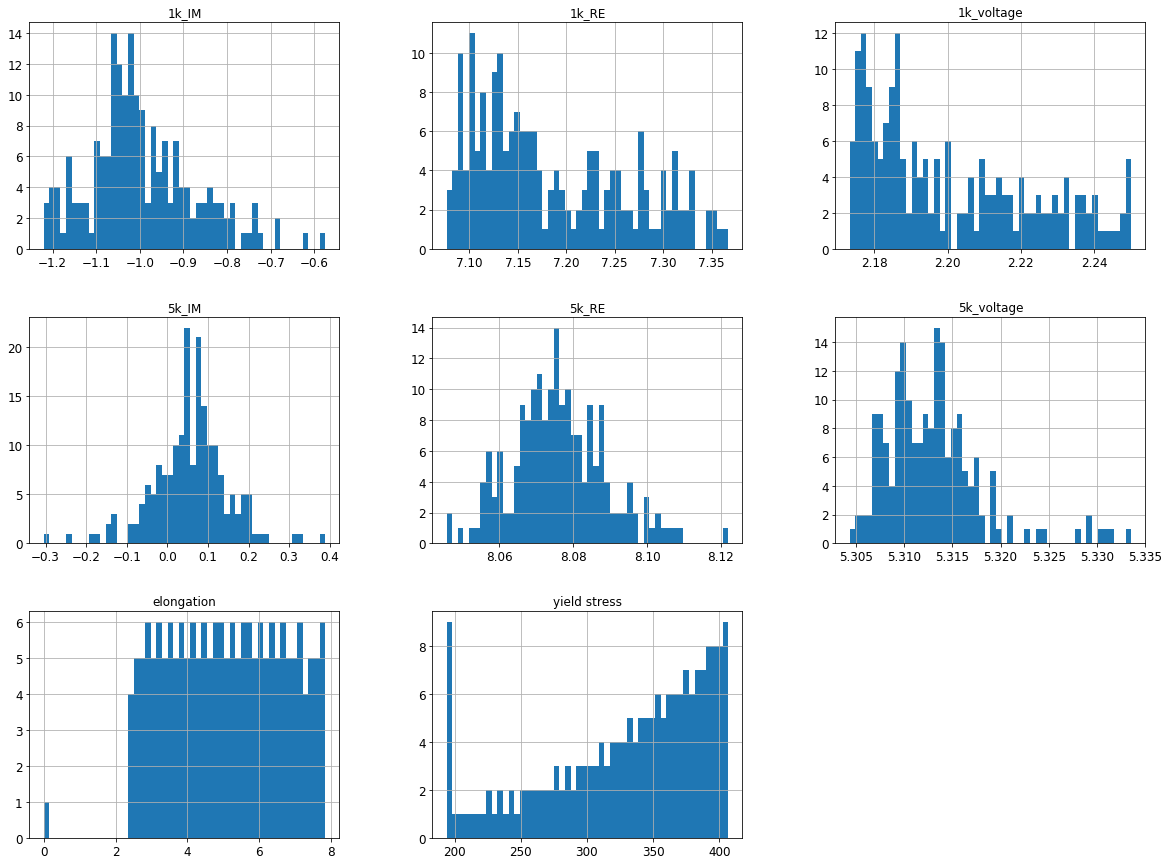

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [15]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [8]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_voltage", "1k_RE", "1k_IM", "5k_voltage", "5k_RE", "5k_IM"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2, random_state=42)
len(X_train)

152

In [9]:
len(X_test)

38

In [45]:
df_copy = df

df_copy.loc[:,["1k_voltage"]] = np.exp(df_copy.loc[:,["1k_voltage"]])

In [46]:
for i in range(1,len(df['1k_voltage'])):
    if (df['1k_voltage'][i] == df_copy['1k_voltage'][i]):
        print("yes")

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [18]:
#X_train.to_csv("X_train.csv", mode='w')

Discover and visualize the data to gain insights
===

In [12]:
# Copy the dataset in order not to harm train set
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 8 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_voltage      190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
dtypes: float64(8)
memory usage: 13.4 KB


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 51 to 102
Data columns (total 6 columns):
1k_voltage    152 non-null float64
1k_RE         152 non-null float64
1k_IM         152 non-null float64
5k_voltage    152 non-null float64
5k_RE         152 non-null float64
5k_IM         152 non-null float64
dtypes: float64(6)
memory usage: 8.3 KB


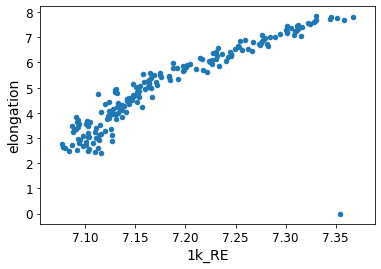

In [13]:
df_copy.plot(kind="scatter", x="1k_RE", y="elongation")

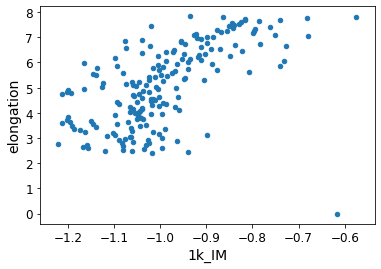

In [14]:
df_copy.plot(kind="scatter", x="1k_IM", y="elongation")

In [32]:
expdata1 = np.exp(df['1k_voltage'])
expdata2 = np.exp(df['elongation'])

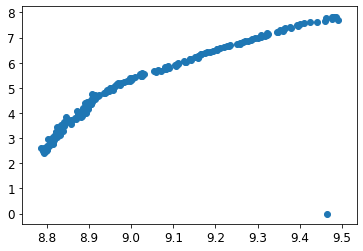

In [38]:
#plt.scatter(expdata1, df['elongation'])
plt.scatter(expdata1, df['elongation'])

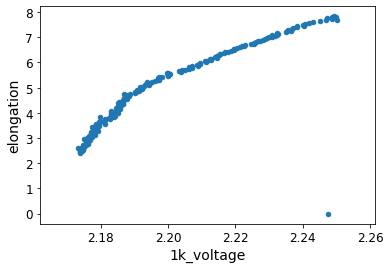

In [23]:
df_copy.plot(kind="scatter", x="1k_voltage", y="elongation")

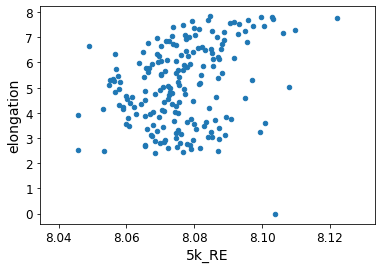

In [16]:
df_copy.plot(kind="scatter", x="5k_RE", y="elongation")

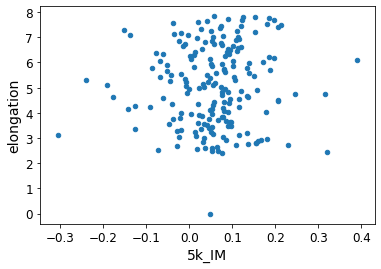

In [17]:
df_copy.plot(kind="scatter", x="5k_IM", y="elongation")

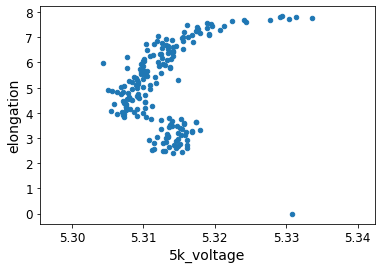

In [18]:
df_copy.plot(kind="scatter", x="5k_voltage", y="elongation")

In [23]:
# Analysis of Standard correlation coefficient
corr_matrix = df_copy.corr()
corr_matrix

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_voltage,5k_RE,5k_IM
yield stress,1.000000,-0.886806,-0.994657,-0.980480,-0.732689,-0.581111,-0.441823,-0.082548
elongation,-0.886806,1.000000,0.897797,0.883247,0.591942,0.294499,0.290037,0.053422
1k_voltage,-0.994657,0.897797,1.000000,0.987401,0.736476,0.557735,0.421207,0.079463
1k_RE,-0.980480,0.883247,0.987401,1.000000,0.816920,0.539938,0.405007,0.075760
1k_IM,-0.732689,0.591942,0.736476,0.816920,1.000000,0.477172,0.310078,0.035729
5k_voltage,-0.581111,0.294499,0.557735,0.539938,0.477172,1.000000,0.596119,0.079823
5k_RE,-0.441823,0.290037,0.421207,0.405007,0.310078,0.596119,1.000000,0.081091
5k_IM,-0.082548,0.053422,0.079463,0.075760,0.035729,0.079823,0.081091,1.000000


In [24]:
# Check what affects the most for the yield stress
corr_matrix["yield stress"].sort_values(ascending=False)


# 1kHz_voltage > 1k_RE > 1k_IM


yield stress    1.000000
5k_IM          -0.082548
5k_RE          -0.441823
5k_voltage     -0.581111
1k_IM          -0.732689
elongation     -0.886806
1k_RE          -0.980480
1k_voltage     -0.994657
Name: yield stress, dtype: float64

In [25]:
corr_matrix["elongation"].sort_values(ascending=False)

elongation      1.000000
1k_voltage      0.897797
1k_RE           0.883247
1k_IM           0.591942
5k_voltage      0.294499
5k_RE           0.290037
5k_IM           0.053422
yield stress   -0.886806
Name: elongation, dtype: float64

In [26]:
print(X_train)

     1k_voltage     1k_RE     1k_IM  5k_voltage     5k_RE     5k_IM
51     2.215403  7.245305 -0.903072    5.312309  8.068984  0.092698
35     2.225431  7.275967 -0.897505    5.312577  8.066472  0.074681
118    2.186764  7.151657 -1.049820    5.310293  8.075633  0.080307
60     2.210931  7.240860 -0.730820    5.310039  8.070268  0.101880
161    2.177262  7.109777 -1.014860    5.316873  8.084991  0.013395
..          ...       ...       ...         ...       ...       ...
106    2.190218  7.131141 -1.193878    5.307907  8.073338 -0.004794
14     2.238255  7.301127 -1.019791    5.319624  8.100449  0.073257
92     2.194620  7.163972 -1.123455    5.311815  8.081840  0.059281
179    2.174875  7.086661 -1.157326    5.314225  8.078636  0.109185
102    2.190797  7.129122 -1.198810    5.305030  8.069795  0.157954

[152 rows x 6 columns]


## PCA & ICA Feature Extraction

In [88]:
df = pd.read_csv("3MA_data+ica+pca.csv")
df = df.drop(df.index[190:209])
df.head()

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_RE,5k_IM,5k_voltage,ica_1,ica_2,...,ica_8,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,193.928416,0.000000,2.247535,7.353994,-0.617027,8.103753,0.048710,5.330770,-0.116510,-0.117151,...,-0.075769,330.186138,35.414014,13.629898,-0.042054,-0.067931,-0.026539,0.174546,0.150698,3.271426
1,193.928416,7.832161,2.249186,7.330924,-0.934697,8.084683,0.057399,5.329357,0.786518,-3.171239,...,-0.557662,327.215644,36.184830,-1.546919,0.264383,-1.961450,-1.454055,-0.901060,-0.069204,0.789393
2,193.928416,7.825444,2.248753,7.367316,-0.574723,8.099559,0.125401,5.331381,0.081439,-4.195743,...,-0.308729,324.177928,37.222513,-2.131075,0.421728,2.517910,-0.056068,0.758381,-0.524406,1.443719
3,193.928416,7.813692,2.249833,7.345533,-0.862965,8.103011,0.153286,5.329095,0.951304,-2.862410,...,0.559499,321.141359,38.188802,-1.392249,-0.649956,-0.864369,0.426757,-1.052226,0.228620,0.481708
4,193.928416,7.780144,2.247326,7.350974,-0.681030,8.122078,0.185302,5.333564,-0.096708,-4.449416,...,0.295758,318.102756,39.253055,-2.435435,-0.370063,1.345922,1.818258,0.718582,-0.071789,1.750102


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 25 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_voltage      190 non-null float64
ica_1           190 non-null float64
ica_2           190 non-null float64
ica_3           190 non-null float64
ica_4           190 non-null float64
ica_5           190 non-null float64
ica_6           190 non-null float64
ica_7           190 non-null float64
ica_8           190 non-null float64
pca_1           190 non-null float64
pca_2           190 non-null float64
pca_3           190 non-null float64
pca_4           190 non-null float64
pca_5           190 non-null float64
pca_6           190 non-null float64
pca_7           190 non-null float64
pca_8           190 non-null float64
pca_9  

In [7]:
from sklearn.decomposition import PCA, FastICA
pca = PCA()
S_pca_ = pca.fit(df).transform(df)

ica = FastICA()
S_ica_ = ica.fit(df).transform(df)  # Estimate the source

S_ica_ /= S_ica_.std(axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [8]:
print("ica shape: ",S_ica_.shape)
print("pca shape: ",S_pca_.shape)

ica shape:  (190, 25)
pca shape:  (190, 25)


In [9]:
S_ica_ = pd.DataFrame(S_ica_)
S_ica_.to_csv("ICA_data.csv", mode ='w')

S_pca_ = pd.DataFrame(S_pca_)
S_pca_.to_csv("PCA_data.csv", mode ='w')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001645671BA58>,
      dtype=object)

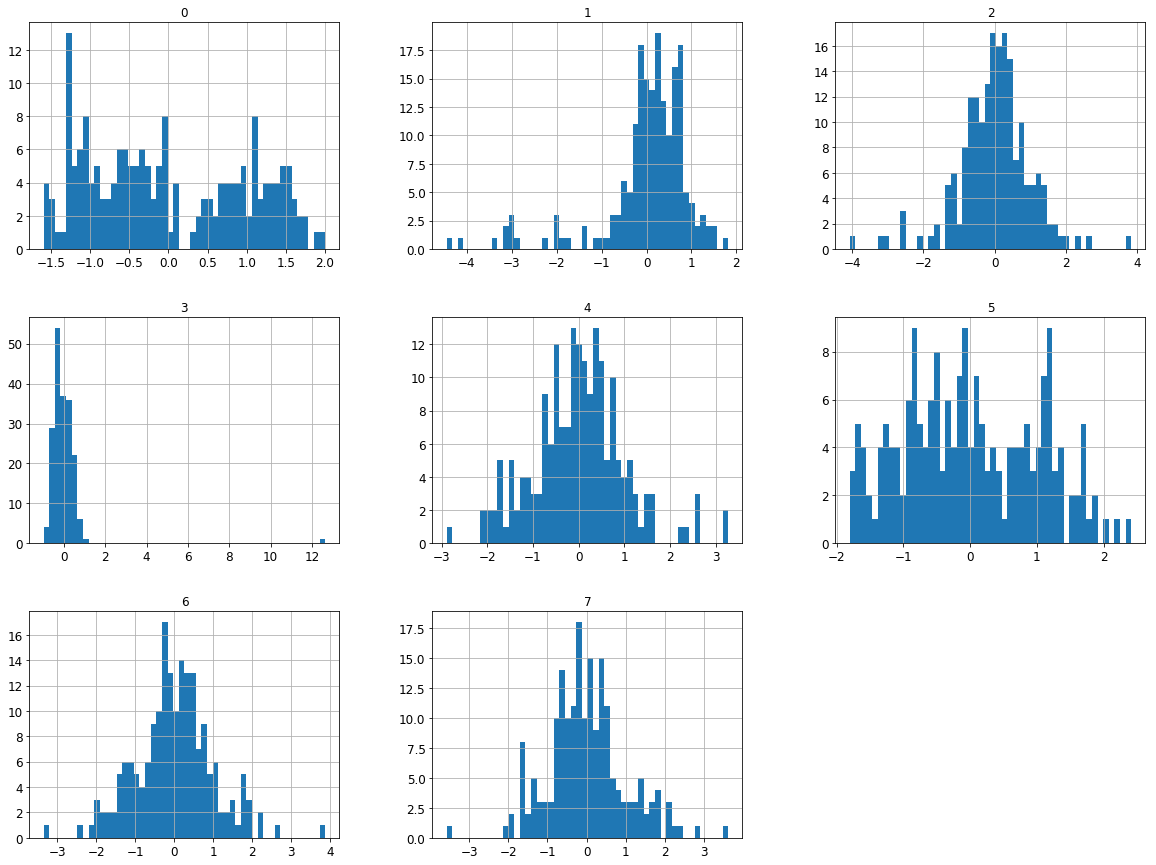

In [44]:
S_ica_.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016458E0A320>,
      dtype=object)

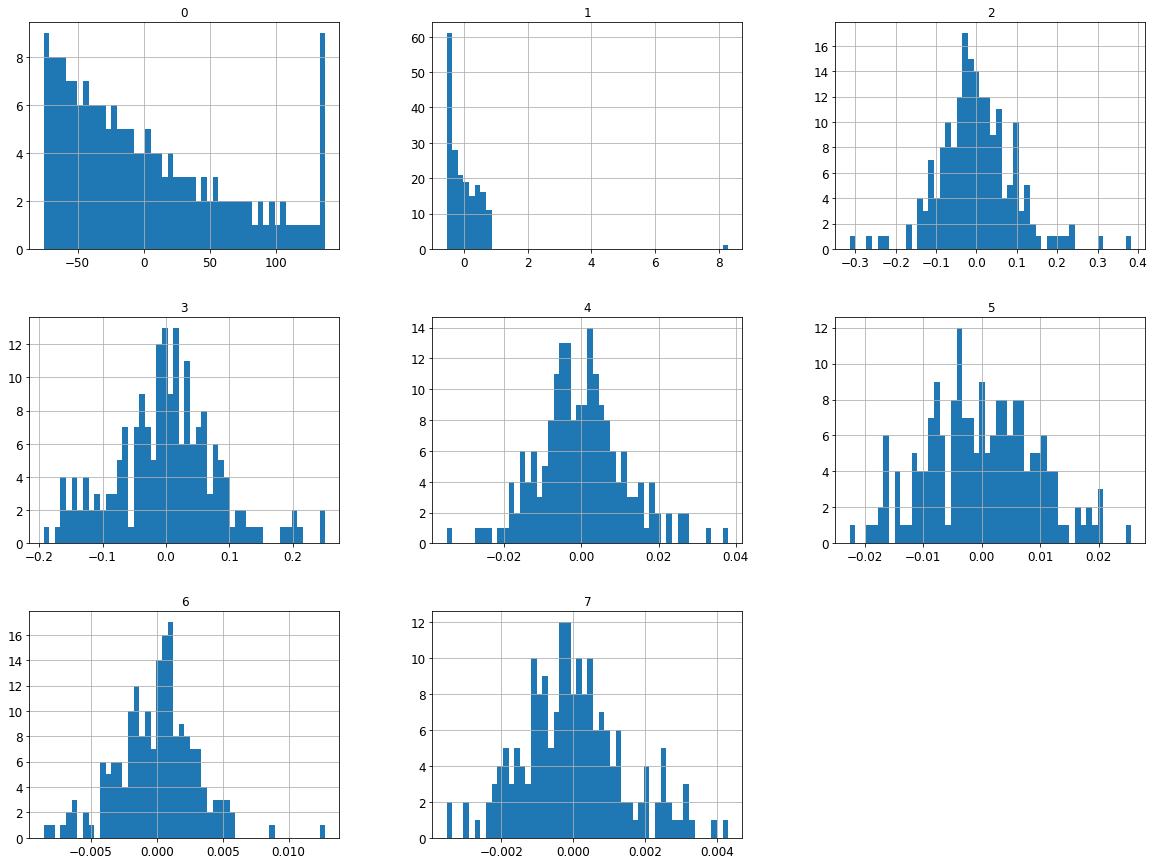

In [45]:
S_pca_ = pd.DataFrame(S_pca_)
S_pca_.hist(bins=50, figsize=(20,15))

In [10]:
# Check that there exist no corelations between the dataset

corr_matrix = S_ica_.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000e+00,0.000022,-0.000043,-0.000007,-5.605449e-07,-2.726560e-05,1.322583e-05,0.000019,0.000032,-3.716771e-05,...,-0.000014,-4.136068e-05,0.000004,0.000008,-2.259049e-05,-1.306074e-05,2.696715e-07,0.000005,0.000017,1.596390e-06
1,2.206196e-05,1.000000,-0.000093,-0.000028,1.575192e-05,-6.167421e-05,3.982392e-05,-0.000009,0.000052,-1.266003e-04,...,-0.000055,-7.528626e-05,0.000007,0.000037,-1.415330e-05,-2.003544e-05,-2.194163e-05,-0.000007,0.000015,-1.792619e-05
2,-4.250039e-05,-0.000093,1.000000,0.000051,3.786023e-05,1.710734e-05,-2.156596e-05,0.000027,0.000001,5.863072e-05,...,-0.000050,3.447562e-05,-0.000047,0.000048,3.340972e-05,2.325778e-05,-5.741162e-05,0.000031,-0.000036,5.970404e-05
3,-7.220401e-06,-0.000028,0.000051,1.000000,-1.909270e-06,-1.302260e-05,-2.543089e-05,0.000003,-0.000005,5.044918e-05,...,0.000013,3.090099e-05,-0.000003,-0.000009,7.102116e-06,8.185500e-06,-1.115073e-05,0.000002,-0.000036,9.314437e-06
4,-5.605449e-07,0.000016,0.000038,-0.000002,1.000000e+00,-5.380406e-06,-4.708920e-05,0.000019,0.000012,3.249027e-05,...,0.000023,2.570945e-05,-0.000005,0.000014,-1.988203e-05,1.664201e-05,-1.751200e-06,0.000014,-0.000019,4.916551e-08
5,-2.726560e-05,-0.000062,0.000017,-0.000013,-5.380406e-06,1.000000e+00,-1.068173e-04,0.000094,0.000123,6.878190e-08,...,-0.000021,4.598289e-05,-0.000060,0.000057,-3.045788e-05,4.212638e-05,-4.075817e-05,0.000002,-0.000074,2.176104e-06
6,1.322583e-05,0.000040,-0.000022,-0.000025,-4.708920e-05,-1.068173e-04,1.000000e+00,0.000042,0.000069,-7.778737e-08,...,0.000029,-6.639979e-05,0.000044,-0.000057,-6.591097e-05,-3.963872e-05,2.266217e-05,-0.000015,0.000006,-6.034356e-06
7,1.894399e-05,-0.000009,0.000027,0.000003,1.882863e-05,9.431170e-05,4.162732e-05,1.000000,-0.000103,-1.488276e-06,...,0.000019,4.702005e-05,-0.000001,-0.000011,7.386648e-05,1.402236e-05,1.723481e-05,-0.000017,0.000029,-2.410667e-05
8,3.165023e-05,0.000052,0.000001,-0.000005,1.226151e-05,1.227096e-04,6.939984e-05,-0.000103,1.000000,-2.487429e-05,...,0.000038,7.476559e-06,0.000027,-0.000028,4.794734e-05,-9.010279e-06,6.051193e-05,-0.000009,0.000074,-3.080134e-05
9,-3.716771e-05,-0.000127,0.000059,0.000050,3.249027e-05,6.878190e-08,-7.778737e-08,-0.000001,-0.000025,1.000000e+00,...,-0.000019,5.531066e-05,-0.000030,0.000003,6.587327e-05,1.411566e-05,-5.004048e-05,0.000015,-0.000043,6.589823e-05


## Choose ICA & PCA data and add

In [3]:
df = pd.read_csv("3MA_data+ica+pca.csv")
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 25 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
5k_voltage      190 non-null float64
ica_1           190 non-null float64
ica_2           190 non-null float64
ica_3           190 non-null float64
ica_4           190 non-null float64
ica_5           190 non-null float64
ica_6           190 non-null float64
ica_7           190 non-null float64
ica_8           190 non-null float64
pca_1           190 non-null float64
pca_2           190 non-null float64
pca_3           190 non-null float64
pca_4           190 non-null float64
pca_5           190 non-null float64
pca_6           190 non-null float64
pca_7           190 non-null float64
pca_8           190 non-null float64
pca_9  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016462D39C88>,
      dtype=object)

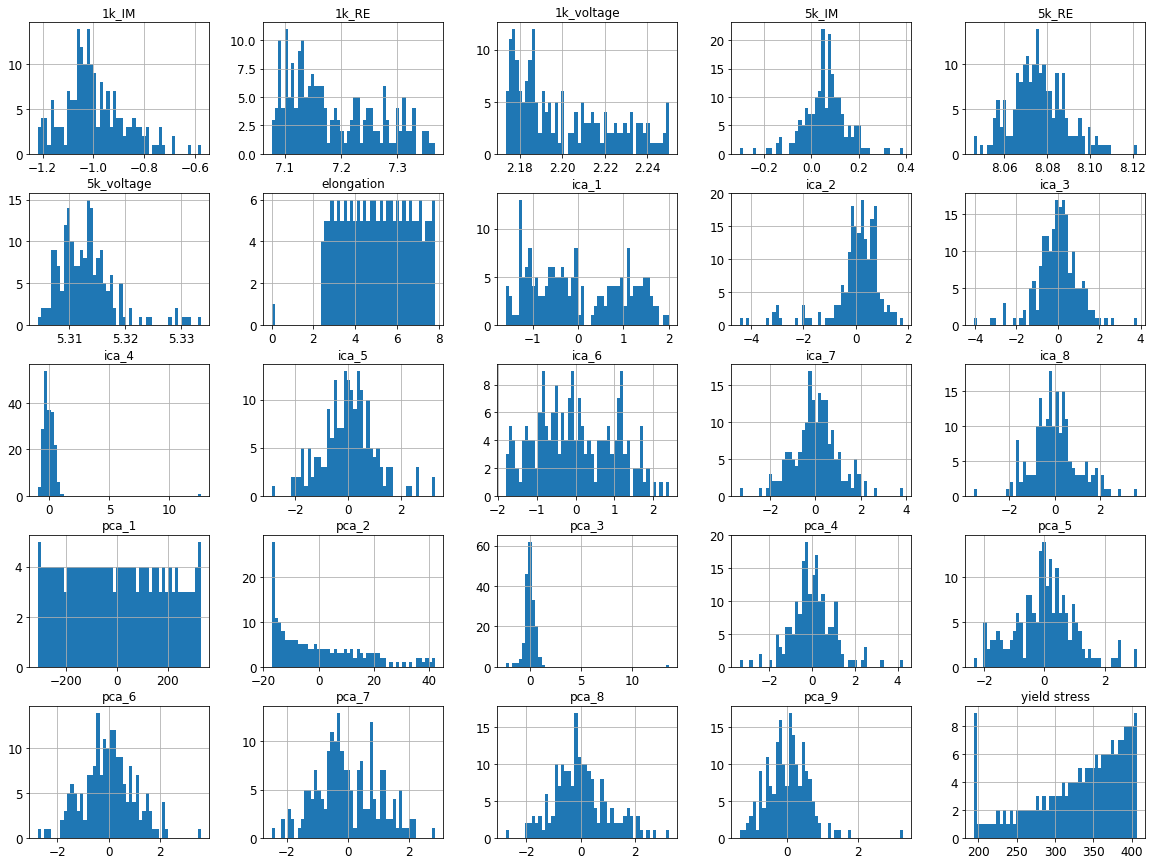

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [4]:
corr_matrix = df.corr()
corr_matrix

,yield stress,elongation,1k_voltage,1k_RE,1k_IM,5k_RE,5k_IM,5k_voltage,ica_1,ica_2,...,ica_8,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
yield stress,1.000000e+00,-8.868064e-01,-0.994657,-0.980480,-0.732689,-0.441823,-0.082548,-0.581111,-7.974723e-01,5.687028e-01,...,-1.795599e-02,-9.690590e-01,-2.468287e-01,1.108465e-04,-1.205606e-06,3.036557e-06,8.185340e-08,-9.070329e-08,-7.555357e-09,4.491580e-04
elongation,-8.868064e-01,1.000000e+00,0.897797,0.883247,0.591942,0.290037,0.053422,0.294499,8.687207e-01,-3.969657e-01,...,2.903598e-02,9.343344e-01,-7.583039e-02,-3.187196e-01,1.228615e-03,9.821797e-04,-8.746846e-06,-4.129535e-06,7.186571e-07,-1.403011e-01
1k_voltage,-9.946571e-01,8.977971e-01,1.000000,0.987401,0.736476,0.421207,0.079463,0.557735,8.455835e-01,-5.053343e-01,...,-6.956068e-03,9.748904e-01,2.022383e-01,5.973957e-03,-1.616849e-03,1.917916e-02,3.118930e-03,-5.955120e-02,-6.207119e-02,-2.955325e-02
1k_RE,-9.804797e-01,8.832472e-01,0.987401,1.000000,0.816920,0.405007,0.075760,0.539938,8.378051e-01,-4.883412e-01,...,8.804798e-02,9.622033e-01,1.946088e-01,1.883758e-02,2.221651e-02,1.527179e-01,5.171684e-03,-1.044125e-01,4.055824e-03,-3.429159e-02
1k_IM,-7.326889e-01,5.919425e-01,0.736476,0.816920,1.000000,0.310078,0.035729,0.477172,5.318012e-01,-4.587311e-01,...,1.164564e-01,6.903772e-01,2.580752e-01,9.235140e-02,1.427463e-01,6.531047e-01,3.296710e-04,9.943667e-03,-3.254351e-04,3.502009e-02
5k_RE,-4.418234e-01,2.900375e-01,0.421207,0.405007,0.310078,1.000000,0.081091,0.596119,2.034947e-01,-4.260365e-01,...,8.760322e-02,3.594748e-01,3.790024e-01,-2.554878e-02,-9.861562e-03,-5.967797e-02,8.305694e-01,2.857613e-02,3.207527e-03,1.793077e-01
5k_IM,-8.254805e-02,5.342175e-02,0.079463,0.075760,0.035729,0.081091,1.000000,0.079823,5.973473e-03,-1.700693e-01,...,3.524469e-01,5.407494e-02,1.222472e-01,-7.526634e-02,-9.707478e-01,1.679176e-01,3.431416e-05,7.975985e-04,-4.809337e-05,7.693001e-02
5k_voltage,-5.811107e-01,2.944989e-01,0.557735,0.539938,0.477172,0.596119,0.079823,1.000000,1.347063e-01,-8.073049e-01,...,-1.128163e-01,4.065300e-01,7.589675e-01,-9.542215e-02,7.252806e-02,-2.103641e-02,1.090417e-01,-1.801921e-01,-1.645491e-01,4.152803e-01
ica_1,-7.974723e-01,8.687207e-01,0.845583,0.837805,0.531801,0.203495,0.005973,0.134706,1.000000e+00,-4.054165e-11,...,1.850096e-11,8.815866e-01,-2.307699e-01,3.881299e-02,-1.358842e-02,-9.980039e-03,3.970434e-02,-2.508090e-01,-1.493847e-01,-2.845388e-01
ica_2,5.687028e-01,-3.969657e-01,-0.505334,-0.488341,-0.458731,-0.426037,-0.170069,-0.807305,-4.054165e-11,1.000000e+00,...,-5.309620e-11,-4.160397e-01,-6.712219e-01,3.631277e-01,2.998450e-03,-2.409953e-02,7.890159e-02,-2.453676e-01,-1.211608e-01,-4.034973e-01


- -1.0과 -0.7 사이이면, 강한 음적 선형관계
- -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계
- -0.3과 -0.1 사이이면, 약한 음적 선형관계
- -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계
- +0.1과 +0.3 사이이면, 약한 양적 선형관계
- +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계
- +0.7과 +1.0 사이이면, 강한 양적 선형관계

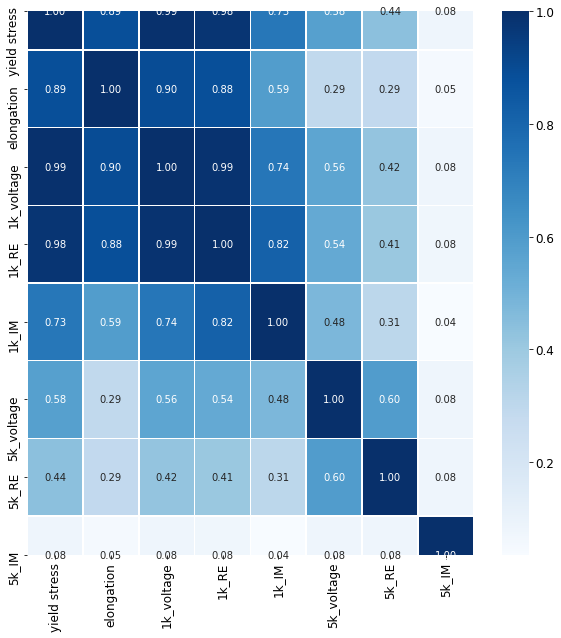

In [31]:
import seaborn as sns  

plt.figure(figsize=(10,10))
sns.heatmap(data = abs(df.corr()), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')


In [6]:
# Check what affects the most for the yield stress
yield_corr = corr_matrix["yield stress"].sort_values(ascending=False)

for key in yield_corr.keys():
    print(key, ":", yield_corr[key])


yield stress : 1.0
ica_2 : 0.568702788773061
ica_3 : 0.028072050998610015
ica_5 : 0.014939176066662495
pca_9 : 0.0004491579620978134
pca_3 : 0.00011084654802045581
pca_5 : 3.036556604920631e-06
pca_6 : 8.185339737867095e-08
pca_8 : -7.555357146298705e-09
pca_7 : -9.070329417414432e-08
pca_4 : -1.2056057342548483e-06
ica_8 : -0.01795598784711785
ica_7 : -0.04138800224526907
ica_6 : -0.06086291803432144
5k_IM : -0.08254804673206297
ica_4 : -0.1840224130034384
pca_2 : -0.2468286885007348
5k_RE : -0.441823369925482
5k_voltage : -0.5811107067374501
1k_IM : -0.7326888502982527
ica_1 : -0.797472251274808
elongation : -0.8868063822288432
pca_1 : -0.969059020131521
1k_RE : -0.980479669847717
1k_voltage : -0.9946570634639302


In [94]:
elong_corr = corr_matrix["elongation"].sort_values(ascending=False)

elongation      1.000000e+00
pca_1           9.343344e-01
1k_voltage      8.977971e-01
1k_RE           8.832472e-01
ica_1           8.687207e-01
1k_IM           5.919424e-01
5k_voltage      2.944989e-01
5k_RE           2.900375e-01
ica_6           1.462408e-01
ica_7           6.555895e-02
5k_IM           5.342175e-02
ica_8           2.903598e-02
pca_4           1.228615e-03
pca_5           9.821799e-04
pca_8           7.181594e-07
pca_7          -4.130112e-06
pca_6          -8.746758e-06
ica_5          -1.411064e-02
ica_3          -3.387105e-02
pca_2          -7.583040e-02
pca_9          -1.403011e-01
ica_4          -2.446810e-01
pca_3          -3.187196e-01
ica_2          -3.969657e-01
yield stress   -8.868064e-01
Name: elongation, dtype: float64

# 10 variables
#### feature discarded: pca_3 ~ pca_8, ica_3, ica_5~ ica_8, 5k_IM

In [15]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,193.928416,0.000001,2.247535,7.353994,-0.617027,8.103753,0.048710,5.330770,-0.116510,-0.117151,...,-0.075769,330.186138,35.414014,13.629898,-0.042054,-0.067931,-0.026539,0.174546,0.150698,3.271426
1,193.928416,7.832161,2.249186,7.330924,-0.934697,8.084683,0.057399,5.329357,0.786518,-3.171239,...,-0.557662,327.215644,36.184830,-1.546919,0.264383,-1.961450,-1.454055,-0.901060,-0.069204,0.789393
2,193.928416,7.825444,2.248753,7.367316,-0.574723,8.099559,0.125401,5.331381,0.081439,-4.195743,...,-0.308729,324.177928,37.222513,-2.131075,0.421728,2.517910,-0.056068,0.758381,-0.524406,1.443719
3,193.928416,7.813692,2.249833,7.345533,-0.862965,8.103011,0.153286,5.329095,0.951304,-2.862410,...,0.559499,321.141359,38.188802,-1.392249,-0.649956,-0.864369,0.426757,-1.052226,0.228620,0.481708
4,193.928416,7.780144,2.247326,7.350974,-0.681030,8.122078,0.185302,5.333564,-0.096708,-4.449416,...,0.295758,318.102756,39.253055,-2.435435,-0.370063,1.345922,1.818258,0.718582,-0.071789,1.750102
5,193.928416,7.742729,2.248745,7.344526,-0.815595,8.103104,0.089639,5.330322,0.582137,-3.361927,...,0.105624,315.066068,40.219078,-1.610580,0.193874,-0.476010,0.297255,-0.447094,0.180261,0.767154
6,193.928416,7.705922,2.250206,7.358278,-0.740627,8.084127,0.123405,5.327734,0.822732,-2.979782,...,-0.019516,312.029066,41.205421,-1.160051,-0.105129,0.518173,-1.245936,-0.507140,-0.165914,0.239901
7,193.928416,7.670275,2.246974,7.330445,-0.816994,8.095942,0.197479,5.324049,0.463827,-3.079435,...,-0.314634,308.991935,42.193935,-0.769560,-1.146472,-0.268112,-0.118007,1.899121,0.055036,-0.229482
8,198.004047,7.635231,2.245037,7.329315,-0.785081,8.079228,0.040980,5.322461,0.367969,-3.036743,...,-0.807350,304.671448,39.325672,-0.654320,0.571696,-0.152964,-1.555318,2.011044,0.362532,-0.299714
9,202.065831,7.600230,2.243179,7.328723,-0.825355,8.091719,0.020096,5.324349,0.362994,-3.031485,...,0.529350,300.354822,36.492382,-0.966852,0.783307,-0.590252,-0.436146,0.745603,1.496338,0.134134


In [7]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_RE","1k_IM", "1k_voltage", "5k_RE", "5k_voltage", "pca_1", "pca_2", "ica_1","ica_2"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2)
len(X_train)

152

In [89]:
# train, test data split of pca & ica
from sklearn.model_selection import train_test_split

X = df.loc[:,["1k_RE","1k_IM", "1k_voltage", "5k_RE", "5k_voltage", "5k_IM"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2)
len(X_train)

152

In [90]:
len(X_test)

38

In [91]:
X_train.shape

(152, 6)

In [92]:
X_train

,1k_RE,1k_IM,1k_voltage,5k_RE,5k_voltage,5k_IM
110,7.148297,-1.056941,2.188365,8.059805,5.309101,0.134880
166,7.097545,-1.114510,2.176707,8.067498,5.313490,0.015088
44,7.262192,-0.871048,2.219713,8.084806,5.313384,0.028430
22,7.301098,-0.798163,2.232501,8.106312,5.317891,-0.020133
31,7.259413,-1.038934,2.228250,8.088805,5.314041,0.109319
72,7.210297,-0.939787,2.206291,8.056814,5.309539,0.081580
84,7.183315,-1.024722,2.197493,8.065206,5.308661,0.104432
76,7.221163,-0.808060,2.203891,8.066271,5.309615,0.082328
30,7.278417,-0.911484,2.228685,8.077429,5.313206,0.116763
56,7.214248,-1.096842,2.214714,8.091798,5.312570,0.197695


In [10]:
# Feature Scaling => Standardization
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_train_std = data_pipeline.fit_transform(X_train)

ys_train = np.array(ys_train)
ys_train =ys_train.reshape(-1, 1)
ys_train = imputer.fit_transform(ys_train)
ys_train_std = data_pipeline.fit_transform(ys_train)


el_train = np.array(el_train)
el_train =el_train.reshape(-1, 1)
el_train = imputer.fit_transform(el_train)
el_train_std = data_pipeline.fit_transform(el_train)

X_test = imputer.fit_transform(X_test)
X_test_std =data_pipeline.fit_transform(X_test)

ys_test = np.array(ys_test)
ys_test = ys_test.reshape(-1, 1)
ys_test = imputer.fit_transform(ys_test)
ys_test_std = data_pipeline.fit_transform(ys_test)

el_test = np.array(el_test)
el_test = el_test.reshape(-1, 1)
el_test = imputer.fit_transform(el_test)
el_test_std = data_pipeline.fit_transform(el_test)


#print(X_train_std)

ys_test_std


array([[ 1.20451104],
       [ 1.24780227],
       [ 0.52677366],
       [-0.17385975],
       [ 0.39560826],
       [-1.74451944],
       [-2.11032816],
       [-1.69025064],
       [ 0.8728661 ],
       [ 0.68318176],
       [ 0.50120669],
       [ 0.31301706],
       [-1.58798893],
       [ 1.10455619],
       [ 0.16493537],
       [ 0.63699534],
       [ 0.43662284],
       [-0.15560221],
       [-0.35878156],
       [-0.70559729],
       [-1.08510976],
       [-1.31649814],
       [ 1.01666267],
       [ 0.34053471],
       [-0.1179416 ],
       [ 0.71827633],
       [ 0.67133709],
       [-1.53925396],
       [-0.62359546],
       [ 0.00440384],
       [ 1.14010928],
       [-0.1366698 ],
       [-2.24669042],
       [ 0.77487445],
       [ 1.1503678 ],
       [ 1.09467335],
       [ 0.0548558 ],
       [ 0.5385152 ]])

In [11]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")

In [12]:
X_train_std.shape

(152, 6)

In [13]:
ys_train.shape

(152, 1)

In [14]:
np.random.seed(42)

Select and train a random forest regression model
===

In [15]:
# Normal Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_std, ys_train_std)
ys_predictions_rf= rf_reg.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
rf_mse = mean_squared_error(ys_train, ys_predictions_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1.0865430015145614

In [37]:
#ys_predictions_rf= np.sort(ys_predictions_rf, axis=None)
ys_predictions_rf

array([300.87740738, 274.50581902, 364.03464568, 312.21383582,
       393.07747164, 328.23086665, 323.07531274, 261.88709831,
       370.00373224, 385.22703177, 393.86356789, 267.5238474 ,
       388.04549625, 215.67042906, 283.69534625, 399.72023252,
       305.80056652, 350.56585499, 345.36929351, 243.7290206 ,
       281.19301085, 364.30254751, 389.21095408, 375.67905   ,
       404.34364277, 378.56617258, 193.928416  , 290.55970629,
       346.13095165, 381.16882264, 365.80575984, 273.74640875,
       377.69481945, 241.44958647, 363.03364973, 333.2252933 ,
       402.43991937, 208.06614612, 361.76319552, 387.30365327,
       193.928416  , 255.10500074, 350.22010143, 193.928416  ,
       269.99548927, 357.67105777, 377.46435146, 342.96040505,
       376.21372392, 206.96163144, 369.6391994 , 370.11763447,
       377.51494449, 193.928416  , 398.97477423, 382.12400638,
       324.13844162, 403.76267738, 315.28016723, 289.97910196,
       360.55059402, 258.66523577, 282.14729132, 382.80

Hyper Parameters Tuning: GridSearch CV function
---

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [38]:
range_2 = [-10, -7,-5, -3, -1, 0]
for i in range(len(range_2)):
    range_2[i] = 10 ** range_2[i]
    
print(range_2)

[1e-10, 1e-07, 1e-05, 0.001, 0.1, 1]


In [106]:
range_2 = [0.75,0.8,0.85,0.9,0.95,1]

In [79]:
range_1 = [3,4,5]
for i in range(len(range_1)):
    range_1[i] = 10 ** range_1[i]
    
print(range_1)

[1000, 10000, 100000]


In [107]:
range_1 = [10000]

In [108]:
range_3 = [1,2]
print(range_3)

[1, 2]


In [48]:
ys_train_std.shape


(152, 1)

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[10000], 'max_features':[0.85],
   'min_samples_leaf':[1]
                      
    }
  ]

rf_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rf_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, ys_train_std.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [17]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.85, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [18]:
grid_search.best_params_

{'max_features': 0.85, 'min_samples_leaf': 1, 'n_estimators': 10000}

In [19]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.06502330660376887 {'max_features': 0.85, 'min_samples_leaf': 1, 'n_estimators': 10000}


In [20]:
ys_rf_final_model = grid_search.best_estimator_

In [21]:
# Feature importance

rf_feature_importance = ys_rf_final_model.feature_importances_
print("feature importances\n")
print("1kHz_voltage: ",rf_feature_importance[0])
print("1kHz_Re: ",rf_feature_importance[1])
print("1kHz_Im: ",rf_feature_importance[2])
print("5kHz_voltage : ",rf_feature_importance[3])
print("5kHz_Re: ",rf_feature_importance[4])
print("5kHz_Im: ",rf_feature_importance[5])


feature importances

1kHz_voltage:  0.7579273008581479
1kHz_Re:  0.22809795975670163
1kHz_Im:  0.000650607478448819
5kHz_voltage :  0.012303344125358523
5kHz_Re:  0.000491037284024455
5kHz_Im:  0.0005297504973187848


In [47]:
X_test = pd.DataFrame(X_test)
ys_test = pd.DataFrame(ys_test)

In [26]:
from sklearn.inspection import permutation_importance

result = permutation_importance(ys_rf_final_model, X_train, ys_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()


{'importances_mean': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.20288655e-06]),
 'importances_std': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.18250251e-06]),
 'importances': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000

In [28]:
result.importances

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [131]:
ys_rf_train_predictions = ys_rf_final_model.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
ys_rf_train_mse = mean_squared_error(ys_train, ys_rf_train_predictions)
ys_rf_train_rmse = np.sqrt(ys_rf_train_mse)
ys_rf_train_rmse

1.1577737796396224

In [132]:
X_test_std = np.array(X_test_std)
#X_test_std= X_test_std.reshape(-1, 1)
#X_test_std

In [133]:
ys_train_sum = np.zeros(1)

for i in range(1, len(ys_train)):
    ys_train_sum +=  ys_train[i]
    
ys_train_avg = ys_train_sum / len(ys_train)
ys_rf_train_err = ys_rf_train_rmse / ys_train_avg * 100
print("ys_rf_train_err: ", ys_rf_train_err, '%')

ys_rf_train_err:  [0.35081821] %


In [134]:
ys_rf_test_predictions = ys_rf_final_model.predict(X_test_std) * np.std(ys_test) + np.mean(ys_test)
ys_rf_test_mse = mean_squared_error(ys_test,ys_rf_test_predictions)
ys_rf_test_rmse = np.sqrt(ys_rf_test_mse)
ys_rf_test_rmse

3.0700711465547195

In [135]:
ys_test_sum = np.zeros(1)

for i in range(1, len(ys_test)):
    ys_test_sum +=  ys_test[i]
    
ys_test_avg = ys_test_sum / len(ys_test)
ys_rf_test_err = ys_rf_test_rmse / ys_test_avg * 100
print("ys_rf_test_err: ", ys_rf_test_err, '%')

ys_rf_test_err:  [0.96702313] %


## Central Limit Theorem

In [120]:
print(cvres['mean_train_score'].shape)
print('Combinations')

(12,)
Combinations


In [121]:
mean_test_score =cvres['mean_test_score']
print(mean_test_score)

[-0.00502575 -0.00512441 -0.00502575 -0.00512441 -0.00423031 -0.00430124
 -0.00423031 -0.00430124 -0.00423031 -0.00430124 -0.04540484 -0.05774846]


In [122]:
mean_train_score =cvres['mean_train_score']
print(mean_train_score)

[-0.00073133 -0.00109078 -0.00073133 -0.00109078 -0.00057837 -0.0007882
 -0.00057837 -0.0007882  -0.00057837 -0.0007882  -0.00669754 -0.01872402]


In [123]:
std_test_score =cvres['std_test_score']
print(std_test_score)

[0.00108706 0.00110626 0.00108706 0.00110626 0.00096263 0.00093242
 0.00096263 0.00093242 0.00096263 0.00093242 0.00632861 0.00650342]


In [124]:
std_train_score =cvres['std_train_score']
print(std_test_score)

[0.00108706 0.00110626 0.00108706 0.00110626 0.00096263 0.00093242
 0.00096263 0.00093242 0.00096263 0.00093242 0.00632861 0.00650342]


In [79]:
  !ls /content/gdrive

'My Drive'


In [80]:
with open('/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt', 'w') as f:
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")


!cat /content/gdrive/My\ Drive/validation/cvscores/Random_Forest/yield_stress/RF_2V.txt



mean_fit_time: [0.00513186 0.00899426 0.01760196 ... 0.03133538 0.04511828 0.09055208]

std_fit_time: [0.00078297 0.00060235 0.0022649  ... 0.0017932  0.00303316 0.00599404]

mean_score_time: [0.00111564 0.00148849 0.00216752 ... 0.00325178 0.00442339 0.00837466]

std_score_time: [0.00018915 0.00055985 0.00037417 ... 0.00043297 0.00078891 0.00137793]

param_bootstrap: [True True True ... False False False]

param_max_depth: [None None None ... 30 30 30]

param_max_features: [0.6 0.6 0.6 ... 1.0 1.0 1.0]

param_min_samples_leaf: [1 1 1 ... 5 5 5]

param_min_samples_split: [2 2 2 ... 8 8 8]

param_n_estimators: [5 10 20 ... 35 50 100]

param_random_state: [42 42 42 ... 42 42 42]

params: [{'bootstrap': True, 'max_depth': None, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 42}, {'bootstrap': True, 'max_depth': None, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 42}, {'bootst

Train data plotting
---

In [136]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/RF_Regression/yield_stress_6V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

Saving figure TrainPrediction_with_6V_RF_ParamFitted


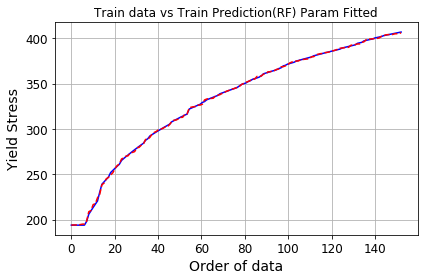

In [137]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
ys_train_sort = np.sort(ys_train, axis=None)
ys_rf_train_predictions_sort= np.sort(ys_rf_train_predictions, axis=None)
plt.plot(xx,ys_train_sort,"b-", xx, ys_rf_train_predictions_sort,"r--")
plt.title("Train data vs Train Prediction(RF) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TrainPrediction_with_6V_RF_ParamFitted")

Saving figure Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted


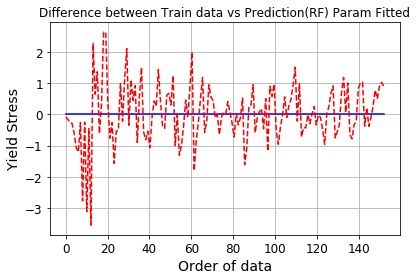

In [138]:
# Difference of train data
difference = ys_train_sort - ys_rf_train_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(RF) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted")


Test data plotting
---

Saving figure TestPrediction_with_6V_RF_ParamFitted


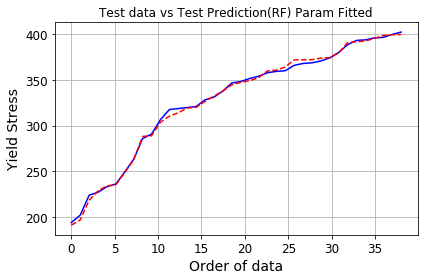

In [139]:
# Difference of train data
xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
ys_test_sort = np.sort(ys_test, axis=None)
ys_rf_test_predictions_sort= np.sort(ys_rf_test_predictions, axis=None)
plt.plot(xx,ys_test_sort,"b-", xx, ys_rf_test_predictions_sort,"r--")
plt.title("Test data vs Test Prediction(RF) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TestPrediction_with_6V_RF_ParamFitted")

Saving figure Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted


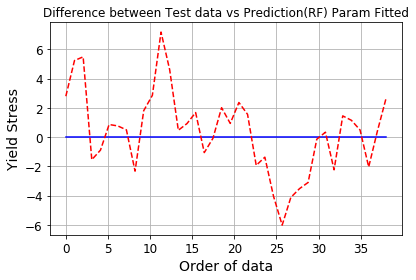

In [140]:
# Difference of train data
difference = ys_test_sort - ys_rf_test_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(RF) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted")


## Extracting files

In [86]:
!ls images/BestHyperParameter/RF_Regression/yield_stress_6V/


Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted.png
Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted.png
TestPrediction_with_6V_RF_ParamFitted.png
TrainPrediction_with_6V_RF_ParamFitted.png


In [0]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM files to local
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/TrainPrediction_with_6V_RF_ParamFitted.png')


In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/TestPrediction_with_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt')

## elongation

In [141]:
# Normal Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_std, el_train_std)
el_predictions_rf= rf_reg.predict(X_train_std) * np.std(el_train) + np.mean(el_train)
rf_mse = mean_squared_error(el_train, el_predictions_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.3222622807983457

In [142]:
#el_predictions_rf= np.sort(el_predictions_rf, axis=None)
el_predictions_rf

array([6.31118392, 6.77043996, 4.48031437, 6.06041944, 3.23847977,
       5.6356798 , 5.8335953 , 6.95964123, 4.22892739, 3.53302335,
       3.22159366, 6.86936557, 3.41817163, 7.445506  , 6.65426277,
       2.83011619, 6.22129253, 4.95673958, 5.15465724, 7.13046791,
       6.67879291, 4.48634467, 3.36558105, 4.01785355, 2.56616582,
       3.86935908, 4.69526627, 6.47714815, 5.11167041, 3.78758269,
       4.46600016, 6.77043394, 3.90141946, 5.74523723, 4.51930233,
       5.49857087, 2.66994017, 7.49613458, 4.56370534, 3.44440191,
       7.75272361, 7.0423792 , 4.83490592, 6.22747005, 6.8512435 ,
       4.7122806 , 3.97256853, 5.24206916, 3.9874726 , 7.49586934,
       4.25275868, 4.22475591, 3.9683734 , 0.78321611, 2.86678956,
       3.71306147, 5.76590825, 2.62470818, 5.98251041, 6.5064498 ,
       4.62967269, 6.99648721, 6.66327395, 3.68434018, 3.61359153,
       7.0997755 , 7.15513765, 3.7869864 , 5.47859027, 5.5433405 ,
       5.38338748, 6.69607021, 4.25934061, 5.39191476, 5.57516

Hyper Parameters Tuning: GridSearch CV function
---

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [145]:
range_2 = [-10, -7,-5, -3, -1, 0]
for i in range(len(range_2)):
    range_2[i] = 10 ** range_2[i]
    
print(range_2)

[1e-10, 1e-07, 1e-05, 0.001, 0.1, 1]


In [211]:
range_2 = [0.835]

In [149]:
range_1 = [1,2,3,4,5]
for i in range(len(range_1)):
    range_1[i] = 10 ** range_1[i]
    
print(range_1)

[10, 100, 1000, 10000, 100000]


In [210]:
range_1 = [75]

In [224]:
range_3 = [3]
print(range_3)

[3]


In [198]:
el_train_std.shape


(152, 1)

In [225]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':range_1, 'max_features':range_2,
   'min_samples_leaf':range_3
                      
    }
  ]

rf_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rf_reg, param_grid, cv=30,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, el_train_std.ravel())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [0.835], 'min_s

In [214]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.835, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [226]:
grid_search.best_params_

{'max_features': 0.835, 'min_samples_leaf': 3, 'n_estimators': 75}

In [227]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4144151366541253 {'max_features': 0.835, 'min_samples_leaf': 3, 'n_estimators': 75}


In [228]:
el_rf_final_model = grid_search.best_estimator_

In [229]:
# Feature importance

rf_feature_importance = el_rf_final_model.feature_importances_
print("feature importances\n")
print("1kHz_voltage: ",rf_feature_importance[0])
print("1kHz_Re: ",rf_feature_importance[1])
print("1kHz_Im: ",rf_feature_importance[2])
print("5kHz_voltage : ",rf_feature_importance[3])
print("5kHz_Re: ",rf_feature_importance[4])
print("5kHz_Im: ",rf_feature_importance[5])


feature importances

1kHz_voltage:  0.7831023944459982
1kHz_Re:  0.15919490763187283
1kHz_Im:  0.018971938384663344
5kHz_voltage :  0.02841486134325704
5kHz_Re:  0.0074149025181992805
5kHz_Im:  0.002900995676009229


In [230]:
el_rf_train_predictions = el_rf_final_model.predict(X_train_std) * np.std(el_train) + np.mean(el_train)
el_rf_train_mse = mean_squared_error(el_train, el_rf_train_predictions)
el_rf_train_rmse = np.sqrt(el_rf_train_mse)
el_rf_train_rmse

0.5048441703477694

In [231]:
X_test_std = np.array(X_test_std)
#X_test_std= X_test_std.reshape(-1, 1)
#X_test_std

In [232]:
el_train_sum = np.zeros(1)

for i in range(1, len(el_train)):
    el_train_sum +=  el_train[i]
    
el_train_avg = el_train_sum / len(el_train)
el_rf_train_err = el_rf_train_rmse / el_train_avg * 100
print("el_rf_train_err: ", el_rf_train_err, '%')

el_rf_train_err:  [10.10948053] %


In [233]:
el_rf_test_predictions = el_rf_final_model.predict(X_test_std) * np.std(el_test) + np.mean(el_test)
el_rf_test_mse = mean_squared_error(el_test,el_rf_test_predictions)
el_rf_test_rmse = np.sqrt(el_rf_test_mse)
el_rf_test_rmse

0.14440267861944778

In [234]:
el_test_sum = np.zeros(1)

for i in range(1, len(el_test)):
    el_test_sum +=  el_test[i]
    
el_test_avg = el_test_sum / len(el_test)
el_rf_test_err = el_rf_test_rmse / el_test_avg * 100
print("el_rf_test_err: ", el_rf_test_err, '%')

el_rf_test_err:  [2.80782267] %


## Central Limit Theorem

In [235]:
print(cvres['mean_train_score'].shape)
print('Combinations')

(1,)
Combinations


In [236]:
mean_test_score =cvres['mean_test_score']
print(mean_test_score)

[-0.17173991]


In [237]:
mean_train_score =cvres['mean_train_score']
print(mean_train_score)

[-0.10049504]


In [238]:
std_test_score =cvres['std_test_score']
print(std_test_score)

[0.82003045]


In [239]:
std_train_score =cvres['std_train_score']
print(std_test_score)

[0.82003045]


In [240]:
  !ls /content/gdrive

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [241]:
with open('/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt', 'w') as f:
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")


!cat /content/gdrive/My\ Drive/validation/cvscores/Random_Forest/yield_stress/RF_2V.txt


FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt'

Train data plotting
---

In [242]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/RF_Regression/elongation_6V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

Saving figure TrainPrediction_with_6V_RF_ParamFitted


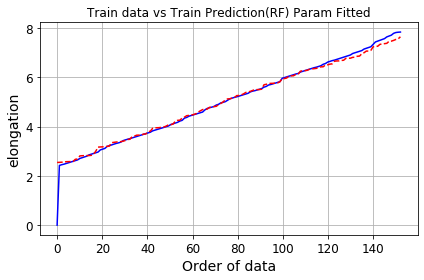

In [243]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
el_train_sort = np.sort(el_train, axis=None)
el_rf_train_predictions_sort= np.sort(el_rf_train_predictions, axis=None)
plt.plot(xx,el_train_sort,"b-", xx, el_rf_train_predictions_sort,"r--")
plt.title("Train data vs Train Prediction(RF) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("elongation")
save_fig("TrainPrediction_with_6V_RF_ParamFitted")

Saving figure Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted


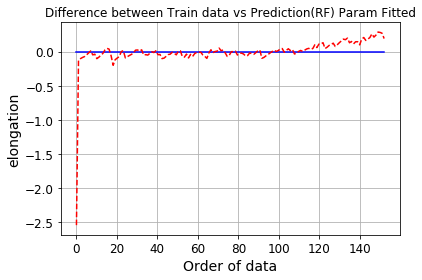

In [244]:
# Difference of train data
difference = el_train_sort - el_rf_train_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(RF) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("elongation")

save_fig("Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted")


Test data plotting
---

Saving figure TestPrediction_with_6V_RF_ParamFitted


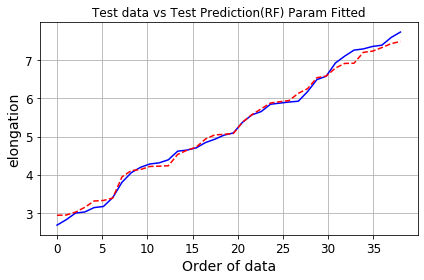

In [245]:
# Difference of train data
xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
el_test_sort = np.sort(el_test, axis=None)
el_rf_test_predictions_sort= np.sort(el_rf_test_predictions, axis=None)
plt.plot(xx,el_test_sort,"b-", xx, el_rf_test_predictions_sort,"r--")
plt.title("Test data vs Test Prediction(RF) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("elongation")
save_fig("TestPrediction_with_6V_RF_ParamFitted")

Saving figure Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted


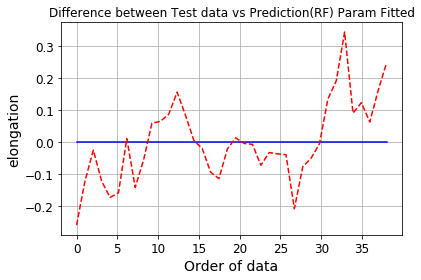

In [246]:
# Difference of train data
difference = el_test_sort - el_rf_test_predictions_sort

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(RF) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("elongation")

save_fig("Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted")


## Extracting files

In [86]:
!ls images/BestHyperParameter/RF_Regression/yield_stress_6V/


Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted.png
Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted.png
TestPrediction_with_6V_RF_ParamFitted.png
TrainPrediction_with_6V_RF_ParamFitted.png


In [0]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM files to local
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/TrainPrediction_with_6V_RF_ParamFitted.png')


In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/TestPrediction_with_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt')